# **Supermarket Sales Analysis**

**Objective**
The objective of this project is to perform an in-depth exploratory data analysis (EDA) on the Supermarket Sales dataset to uncover insights that can help in understanding sales patterns, customer behavior, and business performance. The analysis aims to identify trends, key performance indicators, and actionable insights that can assist in strategic decision-making for improving sales and customer satisfaction.


**Dataset Explanation**

The Supermarket Sales dataset contains information on transactions from a supermarket. Each row represents a single transaction, capturing various attributes related to the sale, such as product details, customer information, and sales data.

**Dataset Columns**:
1. **Invoice ID**: **Unique identifier for each transaction.**
2. **Branch**: Branch identifier where the transaction took place (A, B, C).
3. **City**: The city where the branch is located (Yangon, Naypyitaw, Mandalay).
4. **Customer type**: Type of customer (Member or Normal).
5. **Gender**: Gender of the customer (Female or Male).
6. **Product line**: Category of the product purchased (e.g., Health and beauty, Electronic accessories, etc.).
7. **Unit price**: Price per unit of the product.
8. **Quantity**: Number of units purchased.
9. **Tax 5%**: Tax amount for the transaction.
10. **Total**: Total amount for the transaction (including tax).
11. **Date**: Date of the transaction.
12. **Time**: Time of the transaction.
13. **Payment**: Payment method used (Ewallet, Cash, Credit card).
14. **cogs**: Cost of goods sold.
15. **Gross margin percentage**: Gross margin percentage.
16. **Gross income**: Gross income from the transaction.
17. **Rating**: Customer rating for the transaction.


 **Exploratory Data Analysis**

**Data Loading and Initial Setup**<br>
    - Import necessary libraries.<br>
    - Load the dataset into a DataFrame.
    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots

colors = ["#b1e7cd","#854442","#000000","#fff4e6","#3c2f2f",
           "#be9b7b ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]

In [2]:
from google.colab import files
uploaded = files.upload()

Saving supermarket_sales - Sheet1.csv to supermarket_sales - Sheet1.csv


In [3]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")

In [4]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
577,592-34-6155,C,Naypyitaw,Normal,Male,Food and beverages,31.77,4,6.3540,133.4340,1/14/2019,14:43,Ewallet,127.08,4.761905,6.3540,6.2
793,263-12-5321,A,Yangon,Member,Male,Electronic accessories,92.60,7,32.4100,680.6100,2/27/2019,12:52,Credit card,648.20,4.761905,32.4100,9.3
498,401-18-8016,B,Mandalay,Member,Female,Sports and travel,98.13,1,4.9065,103.0365,1/21/2019,17:36,Cash,98.13,4.761905,4.9065,8.9
178,407-63-8975,A,Yangon,Normal,Male,Food and beverages,73.88,6,22.1640,465.4440,3/23/2019,19:16,Ewallet,443.28,4.761905,22.1640,4.4
849,125-45-2293,A,Yangon,Normal,Female,Fashion accessories,99.10,6,29.7300,624.3300,1/19/2019,13:11,Cash,594.60,4.761905,29.7300,4.2


In [5]:
# GET NUM OF COLOMS AND ROWS
print(f"Number of column :{df.shape[1]}\nNumber of rows :{df.shape[0]}")

Number of column :17
Number of rows :1000


In [6]:
# GET THE INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
# CHECK DUPLICATED ROWS
df.duplicated().any()

False

**Data Cleaning and Descriptive Statistics**<br>
    - Check for missing values.<br>
    - Convert 'Date' and 'Time' columns to appropriate data types.<br>
    - Generate summary statistics for numerical and categorical columns.

In [10]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


 **Data Transformation**<br>
    - Extract day, month, and year from the 'Date' column.

In [29]:
# Convert 'Date' and 'Time' to appropriate data types
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [11]:
df.describe(include=np.number)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [30]:
# Summary statistics for numerical columns
numerical_summary = df.describe()
print("\nNumerical Summary:\n", numerical_summary)


Numerical Summary:
         Unit price     Quantity       Tax 5%        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      99.960000    10.000000    49.650000  1042.650000   
std      26.494628     2.923431    11.708825   245.885335   

                             Date        cogs  gross margin percentage  \
count                        1000  1000.00000              1000.000000   
mean   2019-02-14 00:05:45.600000   307.58738                 4.761905   
min           2019-01-01 00:00:00    10.17000                 4.761905   
25%           2019-01-24 00:00:00   118.49750                 4.761905   
50%           2019-02-13 00:00:00   241.76000              

In [31]:
# Summary statistics for categorical columns
categorical_summary = df.describe(include=['object'])
print("\nCategorical Summary:\n", categorical_summary)


Categorical Summary:
        Branch    City Customer type  Gender         Product line      Time  \
count    1000    1000          1000    1000                 1000      1000   
unique      3       3             2       2                    6       506   
top         A  Yangon        Member  Female  Fashion accessories  19:48:00   
freq      340     340           501     501                  178         7   

        Payment  
count      1000  
unique        3  
top     Ewallet  
freq        345  


In [32]:
# Data Transformation: Extract day, month, year from Date
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [12]:
df.describe(include = object)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [13]:
df.drop('Invoice ID',inplace=True,axis= 1)

In [14]:
# GET THE INFO AGAIN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

In [15]:
df.sample(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
848,C,Naypyitaw,Member,Female,Food and beverages,72.88,9,32.7960,688.7160,1/8/2019,19:38,Cash,655.92,4.761905,32.7960,4.0
967,A,Yangon,Member,Male,Home and lifestyle,81.01,3,12.1515,255.1815,1/13/2019,12:55,Credit card,243.03,4.761905,12.1515,9.3
410,B,Mandalay,Normal,Female,Health and beauty,34.21,10,17.1050,359.2050,1/2/2019,13:00,Cash,342.10,4.761905,17.1050,5.1
703,B,Mandalay,Member,Male,Health and beauty,80.47,9,36.2115,760.4415,1/6/2019,11:18,Cash,724.23,4.761905,36.2115,9.2
403,B,Mandalay,Normal,Female,Fashion accessories,39.75,5,9.9375,208.6875,2/22/2019,10:43,Ewallet,198.75,4.761905,9.9375,9.6


 **Visualizations and Insights**

### **Sales by City**
We will analyze the total sales by city to understand the geographical distribution of sales.

<ipython-input-17-a601ff6373c8>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




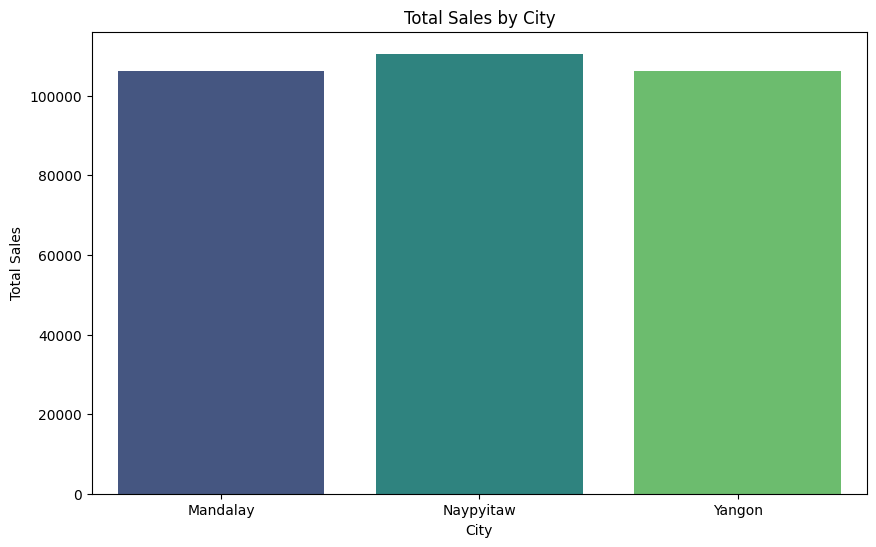

In [17]:
# 1. Sales by City
sales_by_city = df.groupby('City')['Total'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Total', data=sales_by_city, palette='viridis')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

**conclusion:**<br>Helps in understanding the geographical distribution of sales and identifying key markets.

### **Sales by Product Line**
This analysis will help us identify the most and least popular product lines.

<ipython-input-19-cf8750624735>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




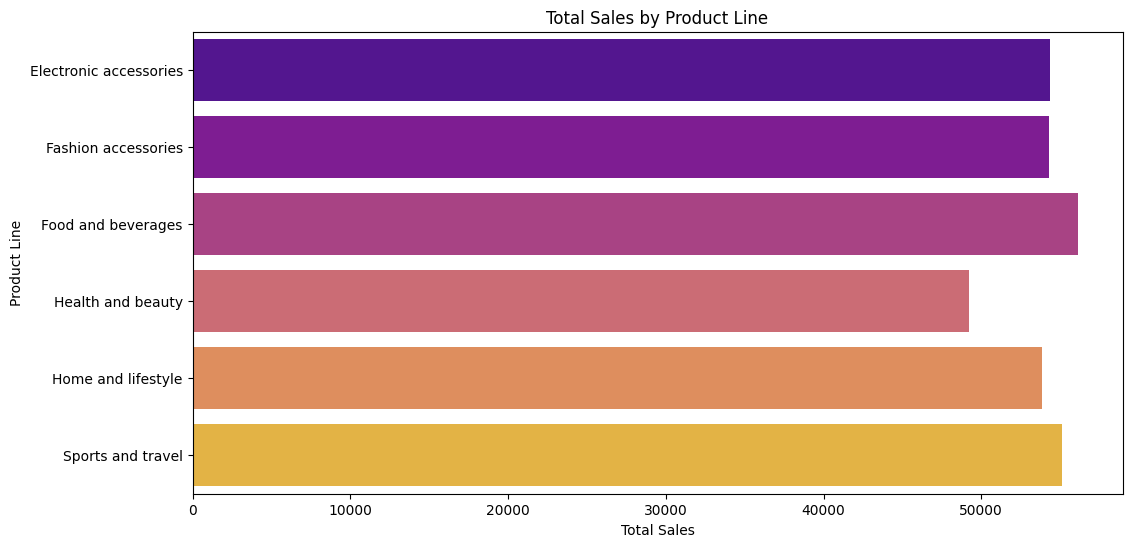

In [19]:
 #2. Sales by Product Line
sales_by_product_line = df.groupby('Product line')['Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Product line', data=sales_by_product_line, palette='plasma')
plt.title('Total Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()

**conclusion:**<br>Identifies the most and least popular product lines, aiding in inventory and marketing decisions.

### **Customer Type Distribution**
We will look at the distribution of customer types to understand our customer base better.

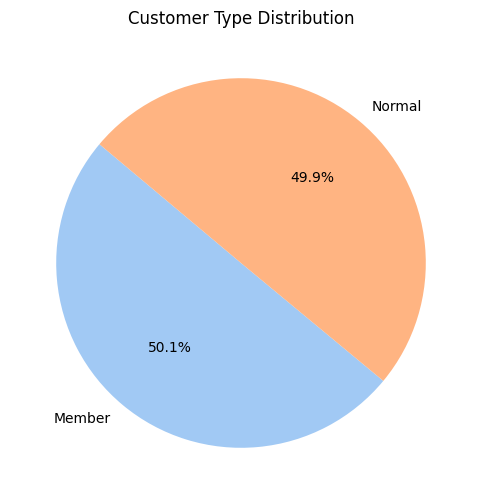

In [20]:
customer_type_dist = df['Customer type'].value_counts()
plt.figure(figsize=(8, 6))
customer_type_dist.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Customer Type Distribution')
plt.ylabel('')
plt.show()


**conclusion:**<br>
Helps tailor marketing strategies for different customer segments.

### **Payment Method Distribution**
Understanding the distribution of payment methods will help us optimize our payment process.


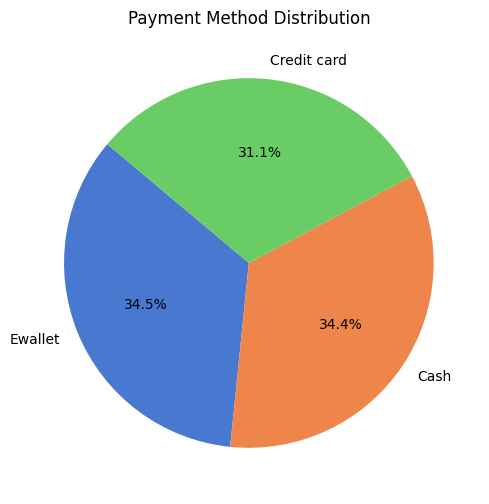

In [22]:
# 4. Payment Method Distribution
payment_method_dist = df['Payment'].value_counts()
plt.figure(figsize=(8, 6))
payment_method_dist.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=140)
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

**conclusion:**<br>Assists in optimizing payment processes and offerings.


### **Average Rating by Product Line**
We will evaluate customer satisfaction across different product lines.


<ipython-input-23-045cd22126fb>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




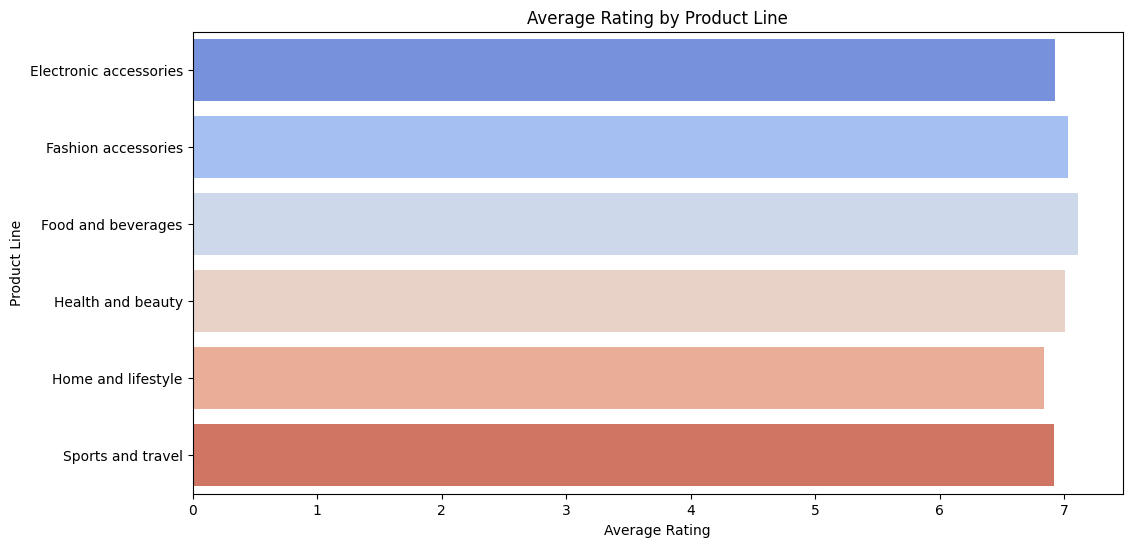

In [23]:
# 5. Average Rating by Product Line
avg_rating_by_product_line = df.groupby('Product line')['Rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Product line', data=avg_rating_by_product_line, palette='coolwarm')
plt.title('Average Rating by Product Line')
plt.xlabel('Average Rating')
plt.ylabel('Product Line')
plt.show()


**conclusion:**<br>Identifies product lines with high and low customer satisfaction, guiding quality improvement efforts.

### **Sales Trend Over Time**
This section will analyze sales patterns and trends over time to identify seasonality and sales spikes.

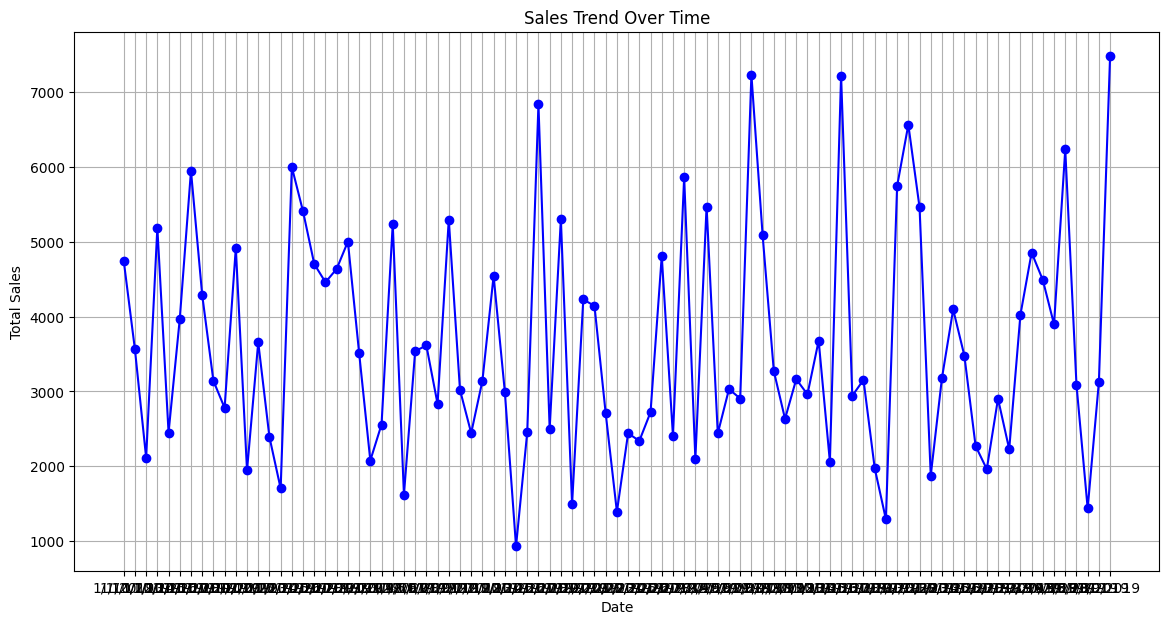

In [25]:
# 6. Sales Trend Over Time
sales_trend = df.groupby('Date')['Total'].sum().reset_index()
plt.figure(figsize=(14, 7))
plt.plot(sales_trend['Date'], sales_trend['Total'], marker='o', color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


**conclusion:**<br>Identifies seasonality, sales spikes, and trends, useful for forecasting and planning.

### **Total Sales by Month**
We will examine monthly sales patterns to understand seasonality.

<ipython-input-33-4df79ec2d845>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




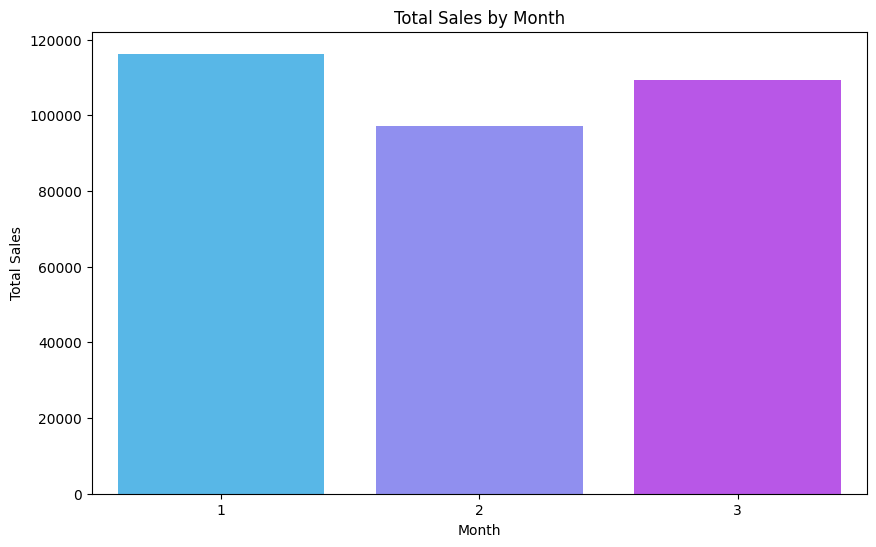

In [33]:
# Sales by Month
sales_by_month = df.groupby('Month')['Total'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total', data=sales_by_month, palette='cool')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

**conclusion:**<br>Helps in understanding sales seasonality and planning for peak periods.

### **Total Sales by Day of the Week**
This analysis will help us determine which days of the week have higher sales.

<ipython-input-36-62598cbe3806>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




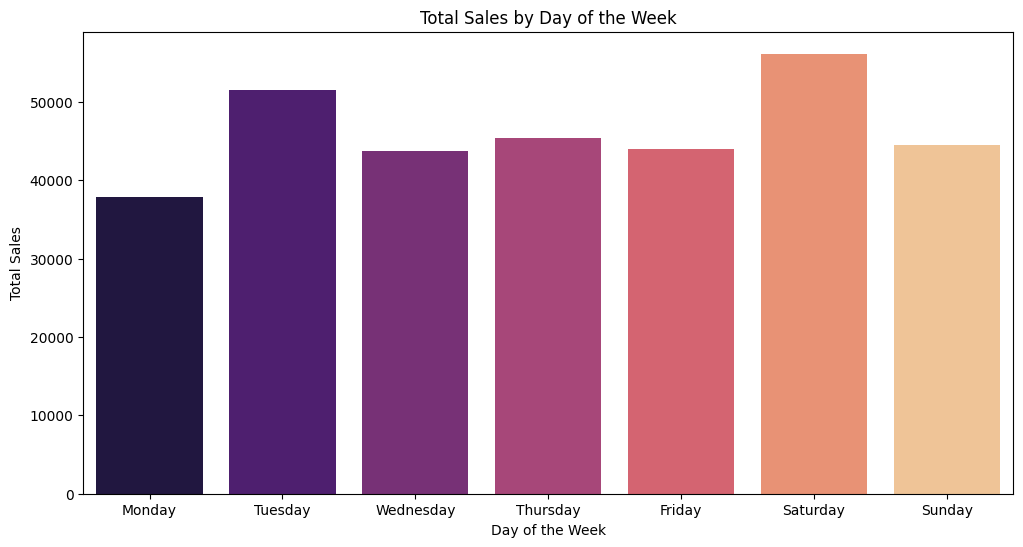

In [36]:
# Sales by Day of the Week
df['Day of Week'] = df['Date'].dt.day_name()
sales_by_day_of_week = df.groupby('Day of Week')['Total'].sum().reset_index()
# Order the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_of_week['Day of Week'] = pd.Categorical(sales_by_day_of_week['Day of Week'], categories=days_order, ordered=True)
sales_by_day_of_week = sales_by_day_of_week.sort_values('Day of Week')

plt.figure(figsize=(12, 6))
sns.barplot(x='Day of Week', y='Total', data=sales_by_day_of_week, palette='magma')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

**conclusion:**<br>Optimizes staffing and marketing efforts for peak days.

<b>Final Conclusion</b>
<br>
This EDA provides a comprehensive overview of the supermarket's sales data, offering valuable insights into sales trends, customer behavior, and business performance. By understanding these patterns, the supermarket can make informed decisions to enhance sales, improve customer satisfaction, and optimize business operations.